In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from typing import List

In [45]:
# model > train_loss > split > split_loss
data = {
    'dgcnn_double': {
        'l1': {
            'train': {
                'l1': pd.read_csv('logs_csv/run-dgcnn_double-train.csv'),
            },
            'val': {
                'l1': pd.read_csv('logs_csv/run-dgcnn_double-val-l1.csv'),
                'chamfer': pd.read_csv('logs_csv/run-dgcnn_double-val-chamfer.csv')
            }
        }
    },
    'dgcnn_single': {
        'l1': {
            'train': {
                'l1': pd.read_csv('logs_csv/run-dgcnn_single-l1-train.csv'),
            },
            'val': {
                'l1': pd.read_csv('logs_csv/run-dgcnn_single-l1-val.csv'),
            }
        },
        'chamfer': {
            'train': {
                'chamfer': pd.read_csv('logs_csv/run-dgcnn_single-chamfer-train.csv'),
            },
            'val': {
                'chamfer': pd.read_csv('logs_csv/run-dgcnn_single-chamfer-val.csv'),
            },
        },
        'mse': {
            'train': {
                'mse': pd.read_csv('logs_csv/run-dgcnn-single-mse-train.csv'),
            },
            'val': {
                'mse': pd.read_csv('logs_csv/run-dgcnn-single-mse-val.csv'),
            }
        }
    },
    'mesh_gnn': {
        'l1': {
            'train': pd.read_csv('logs_csv/run-mesh_gnn-l1-train.csv'),
            'val': {
                'chamfer': pd.read_csv('logs_csv/run-mesh_gnn-l1-val-chamfer.csv'),
                'l1': pd.read_csv('logs_csv/run-mesh_gnn-l1-val-l1.csv'),
            }
        },
        'chamfer': {
            'train': pd.read_csv('logs_csv/run-mesh_gnn-chamfer-train.csv'),
            'val': {
                'chamfer': pd.read_csv('logs_csv/run-mesh_gnn-chamfer-val-chamfer.csv'),
                'l1': pd.read_csv('logs_csv/run-mesh_gnn-chamfer-val-l1.csv'),
            }
        }
    }
}

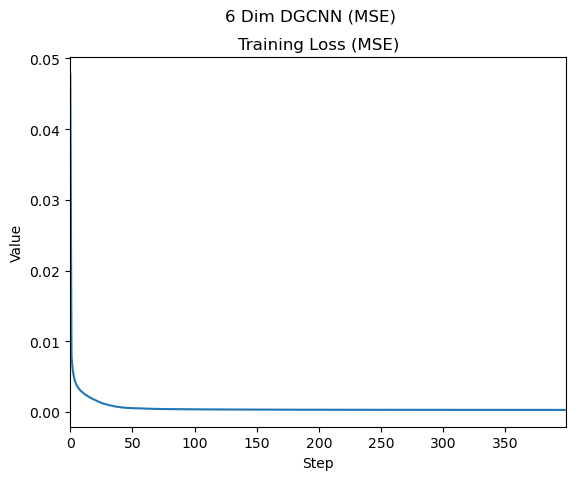

In [47]:
split_names = {
    'val': 'Validation Loss',
    'train': 'Training Loss',
}
model_names = {
    'dgcnn_double': 'Double DGCNN',
    'dgcnn_single': '6 Dim DGCNN',
    'mesh_gnn': 'Mesh GNN',
}
loss_names = {
    'l1': 'L1',
    'chamfer': 'Ch. dist.',
    'mse': 'MSE',
}
def plot(models, split, val_loss):
    model_args = models
    models = []
    train_losses = []
    if model_args == 'all':
        for model in model_names.keys():
            for loss in data[model].keys():
                try:
                    data[model][loss][split][val_loss]
                except KeyError:
                    print(f'Skipping {f"{model}"} - no {split} on {val_loss}')
                    continue
                models.append(model)
                train_losses.append(loss)
    else:
        if type(model_args) is str:
            model_args = [model_args,]
        for m in model_args:
            model, loss = m.split('-')
            models.append(model)
            train_losses.append(loss)

    png_prefix = '-'.join(f'{model}~{loss}' for model, loss in zip(models, train_losses))

    plt.xlabel('Step')
    plt.ylabel('Value')
    plt.title(f'{split_names[split]} ({loss_names[val_loss]})')

    if len(models) == 1:
        plt.suptitle(f'{model_names[models[0]]} ({loss_names[train_losses[0]]})')
    else:
        first_models = models[:-1]
        first_losses = train_losses[:-1]
        last_model = models[-1]
        last_loss = train_losses[-1]
        plt.suptitle(f'{", ".join([f"{model_names[m]} ({loss_names[l]})"  for m, l in zip(first_models, first_losses)])} and {model_names[last_model]} ({loss_names[last_loss]})')

    csvs = [data[model][train_loss][split][val_loss] for model, train_loss in zip(models, train_losses)]
    plt.xlim(0, min(csv.Step.iloc[-1] for csv in csvs))
    for model, loss, csv in zip(models, train_losses, csvs):
        plt.plot(csv.Step, csv.Value, label=f'{model_names[model]} ({loss_names[loss]})')
    if len(models) > 1:
        plt.legend()

    plt.savefig(f'plots/{png_prefix}_{split}_{val_loss}.png')
    plt.show()

# plot('mesh_gnn-chamfer', 'val', 'l1')
# plot(['dgcnn_single-chamfer', 'mesh_gnn-l1', 'mesh_gnn-chamfer'], 'val', 'chamfer')
plot('dgcnn_single-mse', 'val', 'mse')